In [ ]:
import os
import torch
import numpy as np

os.chdir("/Users/federicoferoggio/Documents/vs_code/latent-communication")

from tqdm import tqdm
from torchvision.datasets import MNIST
from torchvision.transforms import transforms
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



from utils.metrics import visualize_dataset_error
from optimization.optimizer import AffineFitting
from models.definitions.PocketAutoencoder import PocketAutoencoder
from utils.dataloaders.dataloader_mnist_single import DataLoaderMNIST
from utils.visualization import (
    visualize_mapping_error,
    visualize_latent_space_pca,
    plot_latent_space,
    highlight_cluster,
)

import matplotlib.pyplot as plt

from models.definitions.smallae import PocketAutoencoder
import itertools


In [ ]:
def load_model(model_path):
    return torch.load(model_path)

def load_mapping(mapping_path):
    return np.load(mapping_path)

# Generate combinations of parameters
num_samples_list = [100]
mapping_list = ["Linear", "Affine"]
lamda_list = [0.001]
combinations = list(itertools.product(num_samples_list, mapping_list, lamda_list))
augmentations = [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]


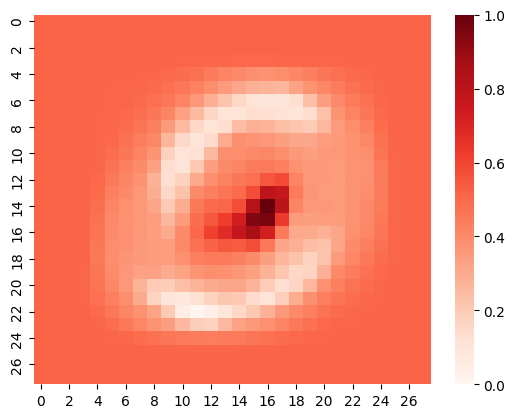

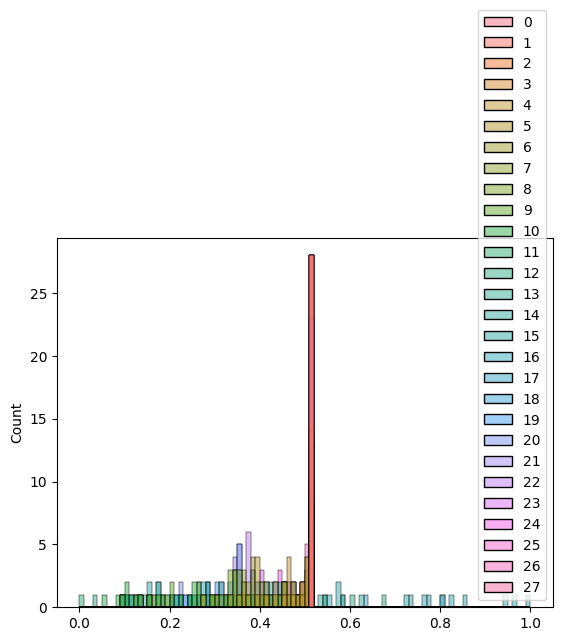

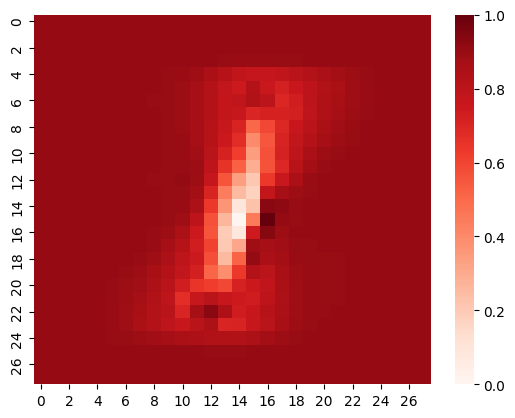

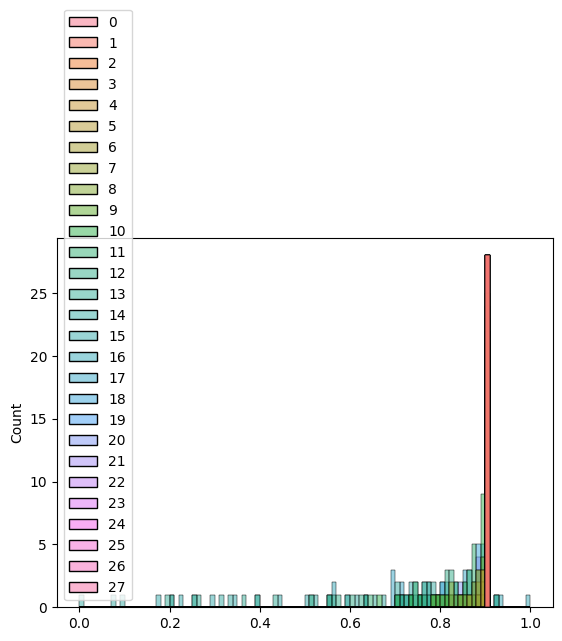

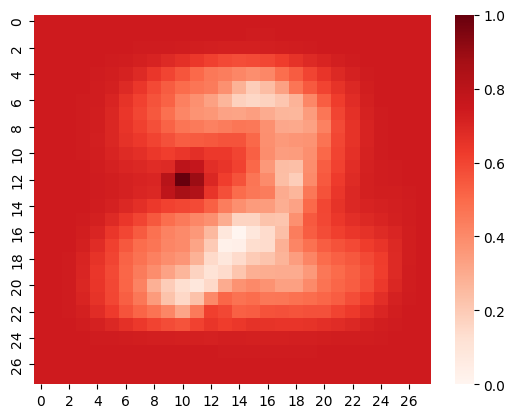

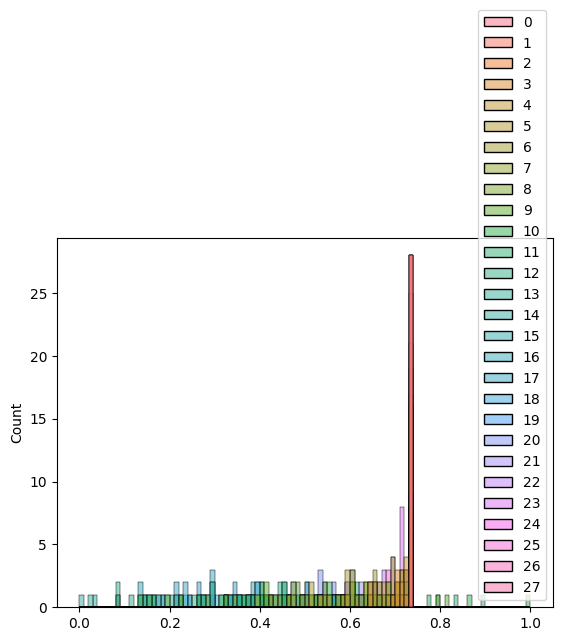

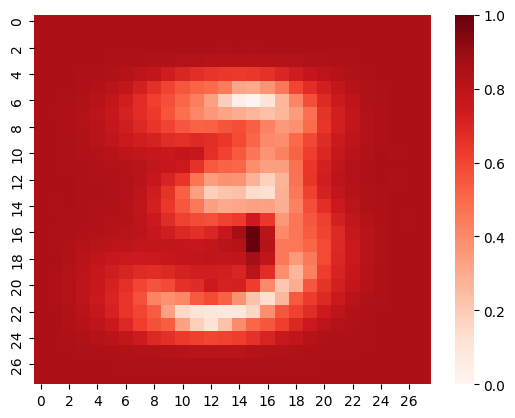

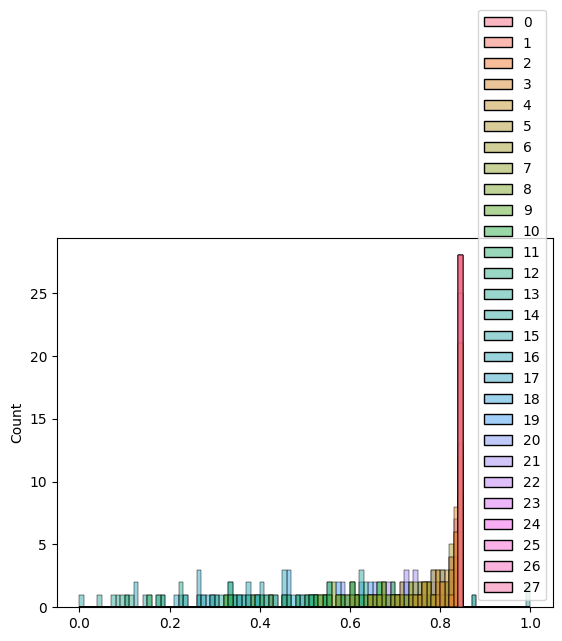

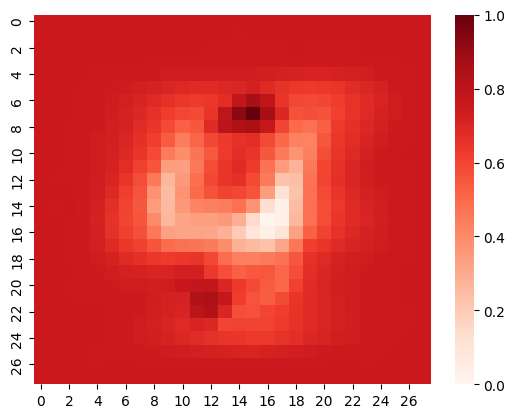

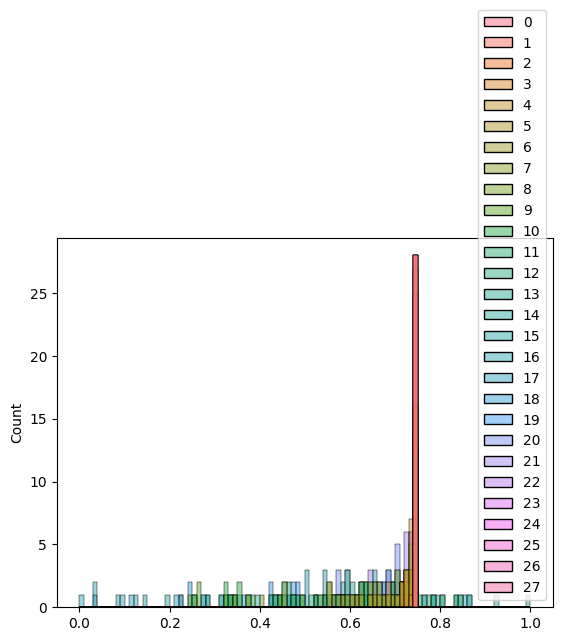

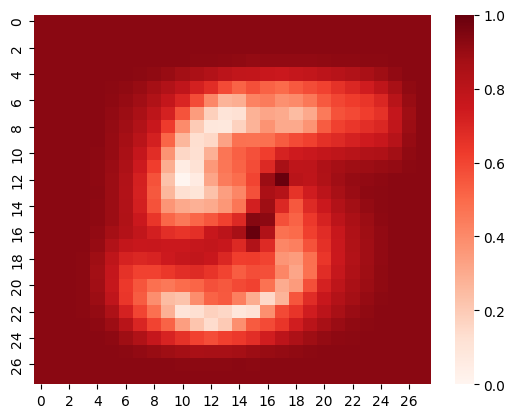

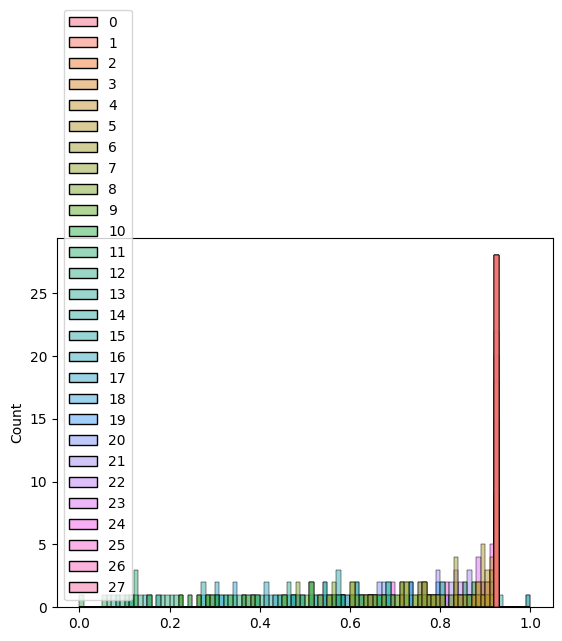

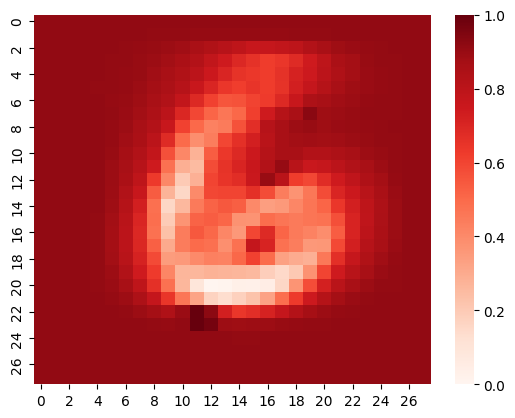

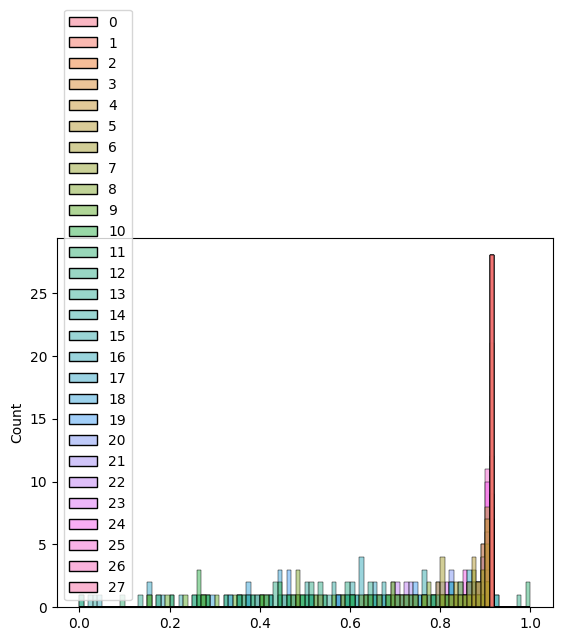

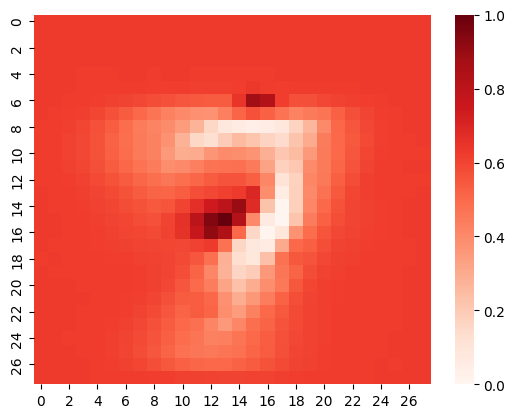

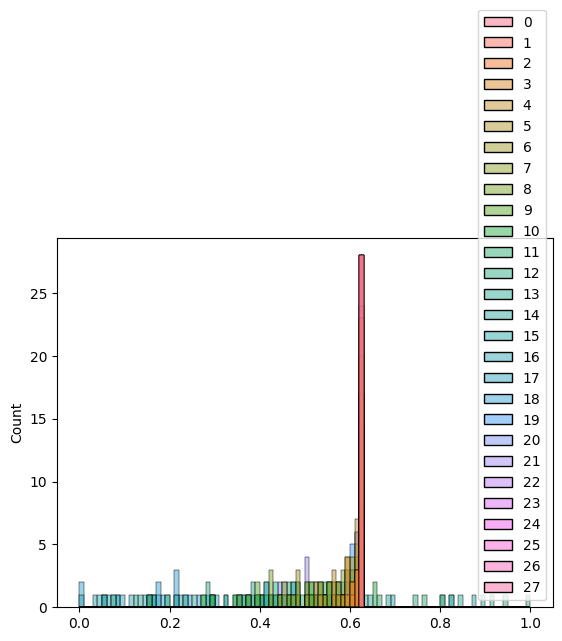

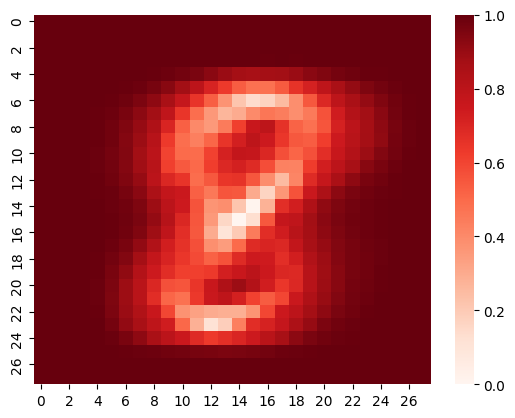

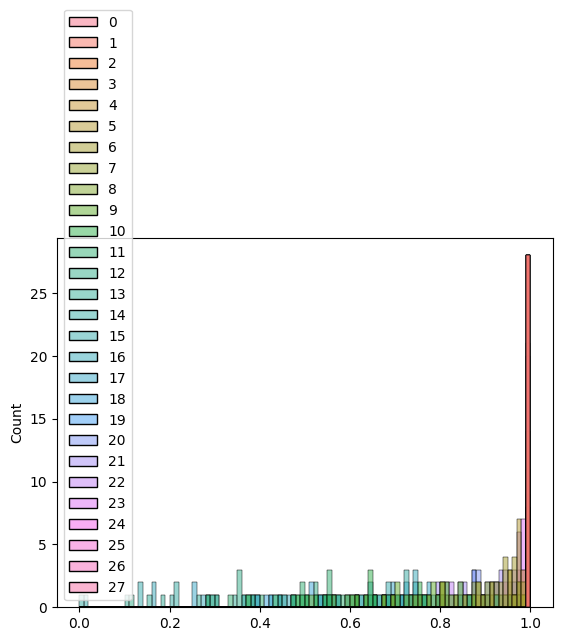

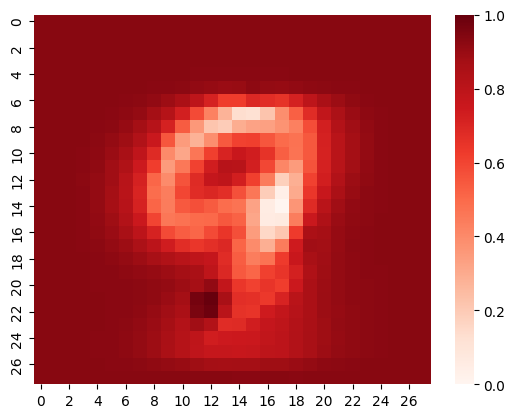

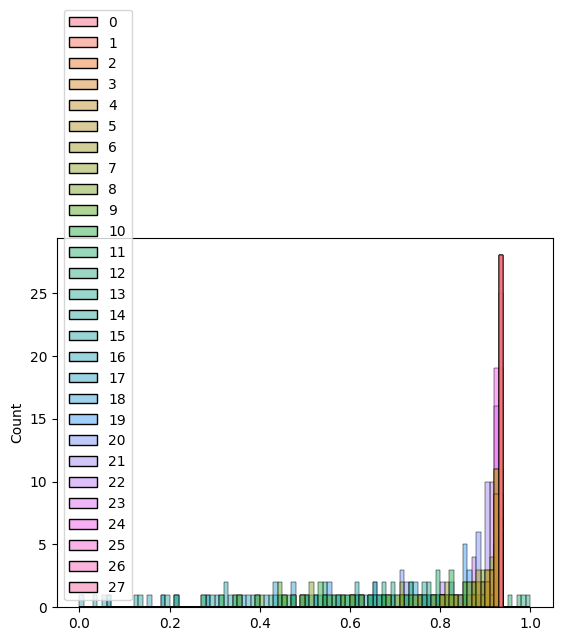

In [17]:
import matplotlib.pyplot as plt
import numpy as np


base_path = './models/checkpoints/SMALLAE/'
results_path = './results/transformations/SMALLAE/'

model1_pth = 'models/checkpoints/SMALLAE/MNIST/MNIST_SMLLAE_0.01_128_20_1.pth'
model2_pth = 'models/checkpoints/SMALLAE/MNIST/MNIST_SMLLAE_0.01_128_20_2.pth'

mapp1_pth = 'results/transformations/SMALLAE/Affine_MNIST_SMLLAE_0.01_128_20_1_->_MNIST_SMLLAE_0.01_128_20_2_49/mapping.pth'
mapp2_pth = 'results/transformations/SMALLAE/Affine_MNIST_SMLLAE_0.01_128_20_1_->_MNIST_SMLLAE_0.01_128_20_2_98/mapping.pth'
mapp3_pth = 'results/transformations/SMALLAE/Affine_MNIST_SMLLAE_0.01_128_20_1_->_MNIST_SMLLAE_0.01_128_20_2_196/mapping.pth'



model1 = PocketAutoencoder()
model1.load_state_dict(load_model(model1_pth))
model1.eval()
model2 = PocketAutoencoder()
model2.load_state_dict(load_model(model2_pth))
model2.eval()

# Load data
data_loader = DataLoaderMNIST(64, transformation=augmentations)
images_all, labels = data_loader.get_full_train_dataset()
# Divide data by labels
for i in range(10):
    images = images_all[labels == i]
    mapping = AffineFitting(model1.get_latent_space(images), model2.get_latent_space(images), 0).from_file(mapp1_pth)

    latents1 = model1.encode(images)
    recomposed = model2.decode(mapping.transform(latents1).float()).detach().numpy()

    errors_per_pixel = np.abs(images - recomposed)
    errors_per_pixel = errors_per_pixel.mean(axis=0)
    errors_per_pixel = errors_per_pixel.mean(axis=0)
    errors_per_pixel = (errors_per_pixel - errors_per_pixel.min()) / (errors_per_pixel.max() - errors_per_pixel.min())

    ## Plot matrix as heatmap
    sns.heatmap(errors_per_pixel.reshape(28,28), cmap='Reds', )
    plt.show()
    plt.close()
    # plot the distribution of the errors for each class
    sns.histplot(errors_per_pixel, bins=100)
    plt.show()

    


In [ ]:
from sklearn.metrics import mean_squared_error

base_path = './models/checkpoints/SMALLAE/'
results_path = './results/transformations/SMALLAE/'

model1_pth = 'models/checkpoints/SMALLAE/MNIST/MNIST_SMLLAE_0.01_128_20_1.pth'
model2_pth = 'models/checkpoints/SMALLAE/MNIST/MNIST_SMLLAE_0.01_128_20_2.pth'

mapp1_pth = 'results/transformations/SMALLAE/Affine_MNIST_SMLLAE_0.01_128_20_1_->_MNIST_SMLLAE_0.01_128_20_2_49/mapping.pth'
mapp2_pth = 'results/transformations/SMALLAE/Affine_MNIST_SMLLAE_0.01_128_20_1_->_MNIST_SMLLAE_0.01_128_20_2_98/mapping.pth'
mapp3_pth = 'results/transformations/SMALLAE/Affine_MNIST_SMLLAE_0.01_128_20_1_->_MNIST_SMLLAE_0.01_128_20_2_196/mapping.pth'

model1 = PocketAutoencoder()
model1.load_state_dict(load_model(model1_pth))
model1.eval()
model2 = PocketAutoencoder()
model2.load_state_dict(load_model(model2_pth))
model2.eval()

# Load data
data_loader = DataLoaderMNIST(64, transformation=augmentations)
images, labels = data_loader.get_full_train_dataset()

num_images = 10
num_mappings = 3

for i in range(num_images):
    image = images[i].unsqueeze(0)
    print(f"Image {i+1}:")
    for j, mapp_pth in enumerate([mapp1_pth, mapp2_pth, mapp3_pth]):
        passed = model2(image).detach().numpy().flatten()
        mapping = AffineFitting(model1.get_latent_space(image), model2.get_latent_space(image), 0).from_file(mapp_pth)
        latents1 = model1.encode(image)
        recomposed1 = model2.decode(mapping.transform(latents1).float()).detach().numpy().flatten()

        mse_loss = mean_squared_error(passed, recomposed1)
        print(f"  Mapping {j+1}: MSE Loss = {mse_loss:.4f}")


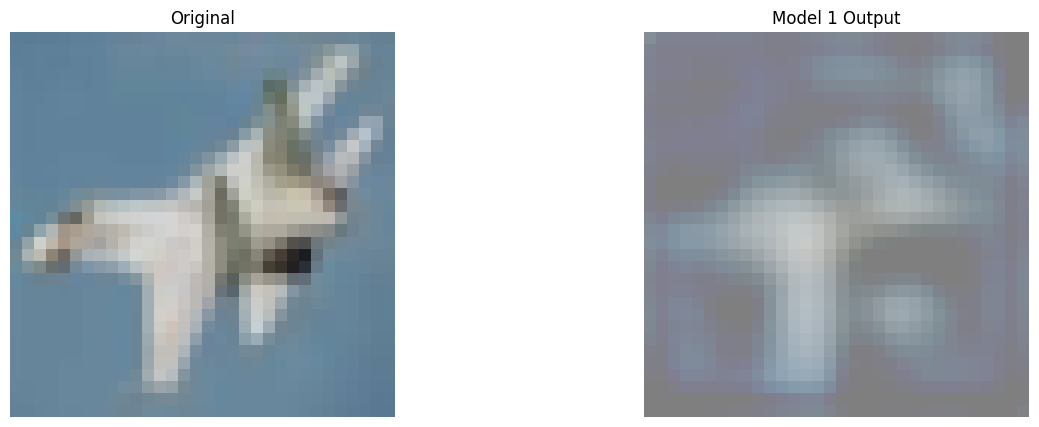

In [11]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
from utils.dataloaders.full_dataloaders import DataLoaderCIFAR10
from models.definitions.smallae import PocketAutoencoder
import matplotlib.pyplot as plt
import os
import numpy as np

# Change working directory
os.chdir("/Users/federicoferoggio/Documents/vs_code/latent-communication")

# File path to the model
file1 = '/Users/federicoferoggio/Documents/vs_code/latent-communication/models/checkpoints/SMALLAE/CIFAR10/CIFAR10_PCKTAE_1000_2.pth'

# Load the model from file
model1 = PocketAutoencoder(path='CIFAR10_PCKTAE_1000_2.pth')
model1.load_state_dict(torch.load(file1))
model1.eval()

# Define the transformations
transform = [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]

# Load dataset with transformations
data_loader = DataLoaderCIFAR10(64, transformation=transform)
images, labels = data_loader.get_full_test_dataset()

# Select an image from the dataset
image = images[10].unsqueeze(0)

# Get the output from the model
with torch.no_grad():
    output1 = model1(image)

# Denormalize the images
def denormalize(tensor):
    return tensor * 0.5 + 0.5

# Display the images
def show_images(images, titles):
    fig, axs = plt.subplots(1, len(images), figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        img = denormalize(img).squeeze().permute(1, 2, 0).numpy()  # Convert to HWC format
        axs[i].imshow(img)
        axs[i].set_title(title)
        axs[i].axis('off')
    plt.show()

show_images([image, output1], ['Original', 'Model 1 Output'])
